# <Center> Clusters of Countries

Grouping countries based on the success of the countries - by examining features from GDP Per Capita top Life Expectancy each country.

## Find Link to Data:
<a href = "https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv" title = 'data'>Link to Data</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Country-data.csv')

---
# <center>CONTENTS
> ## 1. Examining the Dataset
> ## 2. Cleaning Data
> ## 3. Modeling Data
> ## 4. Conclusions
---

 ## <center>1. Examining the DataSet
 >> ### A. Preview Data
 >> ### B. Visualize Data

 ### <center> A. Preview Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


> #### Features Explanation
    
>>   <b>country</b> - Country name
    
>>  <b>child_mort (Child Mortality)</b> - Death of children under 5 years of age per 1,000 live births
    
>>   <b>exports</b> - Exports of goods and services per capita. Given as percentage age of the GDP per capita
    
>>   <b>health</b> - Total helath spending per capita. Given as percentage age of GDP per capita
    
>>   <b>imports</b> - Imports of goods and services per captia. Given as percent age of the GDP per capita
    
>>   <b>income</b> - Net income per person
    
>>   <b>life_expec (Life Expectancy)</b> - The average number of years a new born child would live if the current mortality patterns are to remain the same
    
>>   <b>total_fer (Total Fertility)</b> - The number of children that would be born to each woman if the current age-fertility rates remain the same
    
>>   <b>gdpp (Gross Domestic Product per Capita)</b> - GDP per capita. Calculated as the Total GDP divided by the total Population.

In [4]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### <center> B. Visualize Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

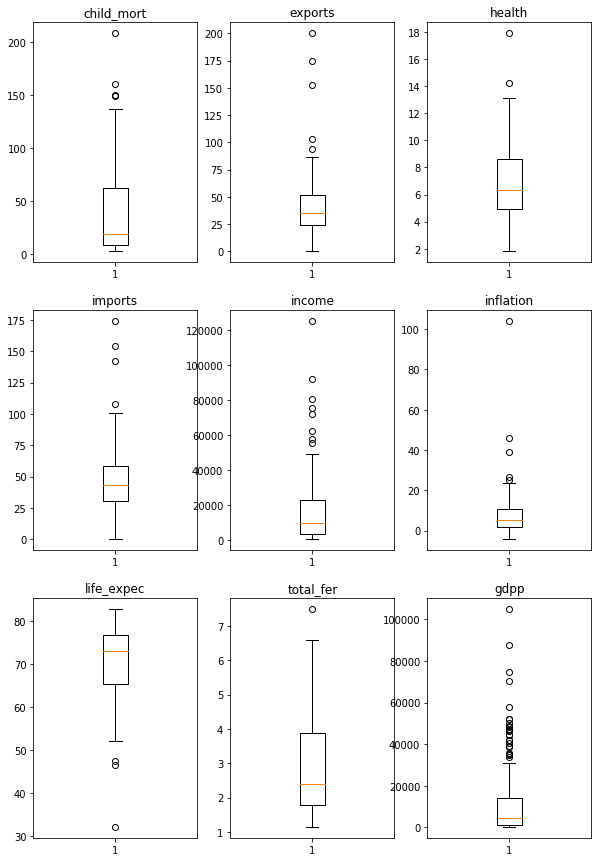

In [6]:
col = data.columns
plt.figure(figsize=(10,15))
value = 1
for c in col:
    if(c != 'country'):
        plt.subplot(3,3,value)
        plt.boxplot(data[c])
        plt.title(c)
        value += 1
plt.show()

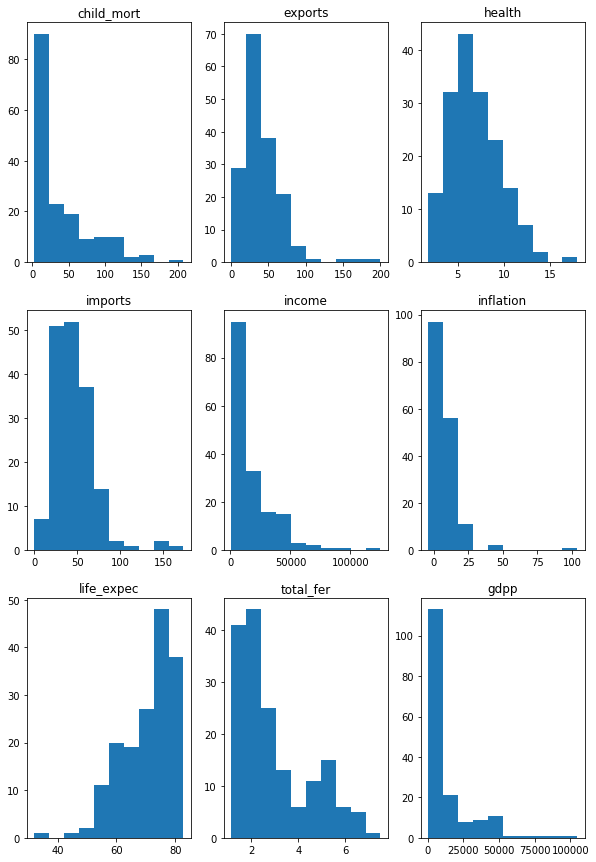

In [7]:
plt.figure(figsize=(10,15))
value = 1
for c in col:
    if(c != 'country'):
        plt.subplot(3,3,value)
        plt.hist(data[c])
        plt.title(c)
        value += 1
plt.show()

### <center>2. Cleaning Data

In [8]:
#col = data.columns
for c in col:
    print('\n',c)
    print(data[c].isnull().value_counts())
    


 country
False    167
Name: country, dtype: int64

 child_mort
False    167
Name: child_mort, dtype: int64

 exports
False    167
Name: exports, dtype: int64

 health
False    167
Name: health, dtype: int64

 imports
False    167
Name: imports, dtype: int64

 income
False    167
Name: income, dtype: int64

 inflation
False    167
Name: inflation, dtype: int64

 life_expec
False    167
Name: life_expec, dtype: int64

 total_fer
False    167
Name: total_fer, dtype: int64

 gdpp
False    167
Name: gdpp, dtype: int64


In [9]:
data[data['child_mort'] > 140].sort_values(by = 'child_mort', ascending = False)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446

In [10]:
data[data['exports']>80].sort_values(by = 'exports', ascending = False)

country  child_mort  exports  health  imports  income  \
133          Singapore         2.8    200.0    3.96    174.0   72100   
91          Luxembourg         2.8    175.0    7.77    142.0   91700   
98               Malta         6.8    153.0    8.65    154.0   28300   
73             Ireland         4.2    103.0    9.19     86.5   45700   
131         Seychelles        14.4     93.8    3.40    108.0   20400   
95            Malaysia         7.9     86.9    4.39     71.0   21100   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
38         Congo, Rep.        63.9     85.1    2.46     54.7    5190   
67             Hungary         6.0     81.8    7.33     76.5   22300   

     inflation  life_expec  total_fer    gdpp  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
98       3.830        80.3       1.36   21100  
73      -3.220        80.4       2.05   48700  
131     -4.210        73.4       2.17   10800  
95       7.270        74.5       2.15    9070  
49      24.900        60.9       5.21   17100  
38      20.700        60.4       4.95    2740  
67       2.330        74.5       1.25   13100

In [11]:
data[data['health']>13].sort_values(by = 'health', ascending = False)

country  child_mort  exports  health  imports  income  \
159          United States         7.3     12.4    17.9     15.8   49400   
101  Micronesia, Fed. Sts.        40.0     23.5    14.2     81.0    3340   
132           Sierra Leone       160.0     16.8    13.1     34.5    1220   

     inflation  life_expec  total_fer   gdpp  
159       1.22        78.7       1.93  48400  
101       3.80        65.4       3.46   2860  
132      17.20        55.0       5.20    399

In [12]:
data[data['imports']>100].sort_values(by = 'imports', ascending = False)

country  child_mort  exports  health  imports  income  inflation  \
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
131  Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
87      Lesotho        99.7     39.4   11.10    101.0    2380      4.150   

     life_expec  total_fer    gdpp  
133        82.7       1.15   46600  
98         80.3       1.36   21100  
91         81.3       1.63  105000  
131        73.4       2.17   10800  
87         46.5       3.30    1170

In [13]:
data[data['income']>50000].sort_values(by = 'income', ascending = False)

country  child_mort  exports  health  imports  income  \
123                 Qatar         9.0     62.3    1.81     23.8  125000   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
133             Singapore         2.8    200.0    3.96    174.0   72100   
114                Norway         3.2     39.7    9.48     28.5   62300   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
145           Switzerland         4.5     64.0   11.50     53.3   55500   

     inflation  life_expec  total_fer    gdpp  
123      6.980        79.5       2.07   70300  
91       3.620        81.3       1.63  105000  
23      16.700        77.1       1.84   35300  
82      11.200        78.2       2.21   38500  
133     -0.046        82.7       1.15   46600  
114      5.950        81.0       1.95   87800  
157     12.500        76.5       1.87   35000  
145      0.317        82.2       1.52   74600

In [14]:
data[data['inflation']>22].sort_values(by = 'inflation', ascending = False)

country  child_mort  exports  health  imports  income  \
113            Nigeria       130.0     25.3    5.07     17.4    5150   
163          Venezuela        17.1     28.5    4.91     17.6   16500   
103           Mongolia        26.1     46.7    5.44     56.7    7710   
149        Timor-Leste        62.6      2.2    9.12     27.8    1850   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
165              Yemen        56.3     30.0    5.18     34.4    4480   
140          Sri Lanka        11.2     19.6    2.94     26.8    8560   
3               Angola       119.0     62.3    2.85     42.9    5900   

     inflation  life_expec  total_fer   gdpp  
113      104.0        60.5       5.84   2330  
163       45.9        75.4       2.47  13500  
103       39.2        66.2       2.64   2650  
149       26.5        71.1       6.23   3600  
49        24.9        60.9       5.21  17100  
165       23.6        67.5       4.67   1310  
140       22.8        74.4       2.20   2810  
3         22.4        60.1       6.16   3530

In [15]:
data[data['life_expec']<51].sort_values(by = 'life_expec', ascending = True)

country  child_mort  exports  health  imports  income  \
66                     Haiti       208.0     15.3    6.91     64.7    1500   
87                   Lesotho        99.7     39.4   11.10    101.0    2380   
31  Central African Republic       149.0     11.8    3.98     26.5     888   

    inflation  life_expec  total_fer  gdpp  
66       5.45        32.1       3.33   662  
87       4.15        46.5       3.30  1170  
31       2.01        47.5       5.21   446

In [16]:
data[data['total_fer']>7].sort_values(by = 'total_fer', ascending = False)

country  child_mort  exports  health  imports  income  inflation  \
112   Niger       123.0     22.2    5.16     49.1     814       2.55   

     life_expec  total_fer  gdpp  
112        58.8       7.49   348

In [17]:
data[data['gdpp'] > 20000].sort_values(by = 'gdpp',ascending = False)

country  child_mort  exports  health  imports  income  \
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
114                Norway         3.2     39.7    9.48     28.5   62300   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
44                Denmark         4.1     50.5   11.40     43.6   44000   
144                Sweden         3.0     46.2    9.63     40.7   42900   
7               Australia         4.8     19.8    8.73     20.9   41400   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
73                Ireland         4.2    103.0    9.19     86.5   45700   
159         United States         7.3     12.4   17.90     15.8   49400   
29                 Canada         5.6     29.1   11.30     31.0   40700   
8                 Austria         4.3     51.3   11.00     47.8   43200   
133             Singapore         2.8    200.0    3.96    174.0   72100   
53                Finland         3.0     38.7    8.95     37.4   39800   
77                  Japan         3.2     15.0    9.49     13.6   35800   
15                Belgium         4.5     76.4   10.70     74.7   41100   
68                Iceland         2.6     53.4    9.40     43.3   38800   
58                Germany         4.2     42.3   11.60     37.1   40400   
54                 France         4.2     26.8   11.90     28.1   36900   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
75                  Italy         4.0     25.2    9.53     27.2   36200   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
42                 Cyprus         3.6     50.2    5.97     57.5   33900   
139                 Spain         3.8     25.5    9.54     26.8   32500   
74                 Israel         4.6     35.0    7.63     32.9   29600   
10                Bahamas        13.8     35.0    7.89     43.7   22900   
60                 Greece         3.9     22.1   10.30     30.7   28700   
135              Slovenia         3.2     64.3    9.41     62.9   28700   
122              Portugal         3.9     29.9   11.00     37.4   27200   
138           South Korea         4.1     49.4    6.93     46.2   30400   
98                  Malta         6.8    153.0    8.65    154.0   28300   
11                Bahrain         8.6     69.5    4.97     50.9   41100   

     inflation  life_expec  total_fer    gdpp  
91       3.620        81.3       1.63  105000  
114      5.950        81.0       1.95   87800  
145      0.317        82.2       1.52   74600  
123      6.980        79.5       2.07   70300  
44       3.220        79.5       1.87   58000  
144      0.991        81.5       1.98   52100  
7        1.160        82.0       1.93   51900  
110      0.848        80.7       1.79   50300  
73      -3.220        80.4       2.05   48700  
159      1.220        78.7       1.93   48400  
29       2.870        81.3       1.63   47400  
8        0.873        80.5       1.44   46900  
133     -0.046        82.7       1.15   46600  
53       0.351        80.0       1.87   46200  
77      -1.900        82.8       1.39   44500  
15       1.880        80.0       1.86   44400  
68       5.470        82.0       2.20   41900  
58       0.758        80.1       1.39   41800  
54       1.050        81.4       2.03   40600  
158      1.570        80.3       1.92   38900  
82      11.200        78.2       2.21   38500  
75       0.319        81.7       1.46   35800  
23      16.700        77.1       1.84   35300  
157     12.500        76.5       1.87   35000  
111      3.730        80.9       2.17   33700  
42       2.010        79.9       1.42   30800  
139      0.160       

In [18]:
data[data['country']== 'United States']

country  child_mort  exports  health  imports  income  inflation  \
159  United States         7.3     12.4    17.9     15.8   49400       1.22   

     life_expec  total_fer   gdpp  
159        78.7       1.93  48400

### Outliers will not be omitted. Sample set may be small, but are representative of the countries around the world. Outliers may be extreme but can represent countries clustering within similar regions of the extreme.
---

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
features = data.drop('country', axis = 1)
scaler = StandardScaler()
all_data = scaler.fit_transform(features)

# Dimensionality Reduction Methods

> Reducing the model to by combining the features
>> Lose information on the data, but optimize visualization and comparing the all the different features together

## PCA 

<b> Find most optimized n_components in PCA 

In [21]:
#first 2 are usually the strongest principal components
for i in range(1, 10):
    pca = PCA(n_components = i)
    #print(features.columns[i-1])
    print('\n',i)
    pca_components = pca.fit_transform(all_data)
    print(pca.explained_variance_ratio_.sum())


 1
0.4595173978609591

 2
0.6313336543771411

 3
0.7613762433466718

 4
0.8719078614023911

 5
0.9453099756439514

 6
0.9701523224082288

 7
0.982756626389879

 8
0.9925694437691406

 9
1.0


In [22]:
#use 4 or 5 for best results without losing too much information
pca = PCA(n_components = 5)
pca_components = pca.fit_transform(all_data)


In [23]:
#add numbers to get total explained variance
pca.explained_variance_ratio_.sum()

0.9453099756439514

## UMAP

In [24]:
import umap

<b>Check for strong correlations

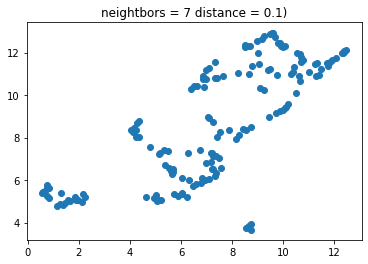

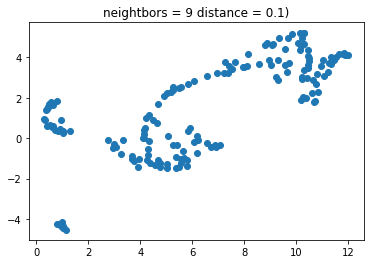

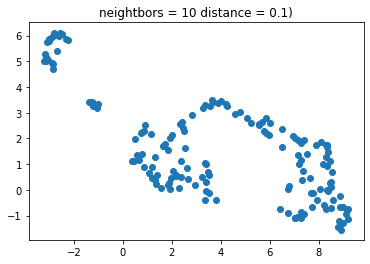

In [25]:

#view all differing results of nieghbors and distance in umap
'''
neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10]
dist = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]

for n in neighbors:
    for d in dist:
        umap_results = umap.UMAP(n_neighbors = n,
                                min_dist = d,
                                metric =  'correlation').fit_transform(all_data)
        plt.scatter(umap_results[:,0], umap_results[:,1])
        plt.title(f'neighbors = {str(n)} distance = {d}')
        plt.show()
'''

#optimized number of neighbors and the distance in umap

optimized_n = [7, 9, 10]
optimized_dist = [.1]

for n in optimized_n:
    for d in optimized_dist:
        umap_results = umap.UMAP(n_neighbors = n,
                                min_dist = d,
                                metric = 'correlation').fit_transform(all_data)
        plt.scatter(umap_results[:,0], umap_results[:,1])
        plt.title(f'neightbors = {n} distance = {d})')
        plt.show()


<b>Best Optimized UMAP results</b>
> neighbors = 7<br>
> distance = 0.1

In [26]:
umap_opt = umap.UMAP(n_neighbors = 7,
                    min_dist = .1,
                    metric = 'correlation').fit_transform(all_data)

<center><b>Examine Correlation of Data

In [27]:
#pearson's correlation
features.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

In [28]:
corr = features.corr()

In [29]:
col = features.columns
strong_corr = []
for c1 in col:
    for c2 in col:
        #print(f' {c1} {c2}')
        if((abs(corr[c1][c2]) > .5) and c1 != c2):
            strong_corr.append([c1,c2])


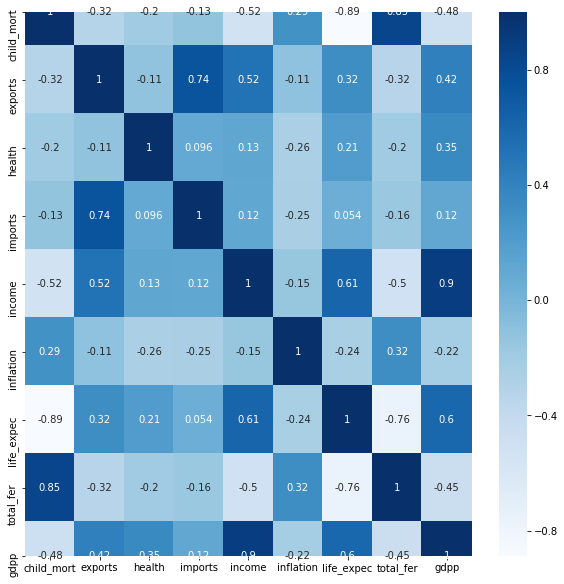

In [30]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(features.corr(), annot = True, cmap = 'Blues')

 ## <center>3. Modeling Data
 >> ### A. K-Means Clustering
 >> ### B. Hierarchical Clustering
 >> ### C. DBSCAN Clustering

 ### <center>A. K-Means Clustering
 >> #### I. Optimize K-Means Cluster and Plot Correlations
 >> #### II. K-Means: PCA - Dimensionality Reduction
 >> #### III. K-Means: UMAP - Dimensionality Reduction

>>#### I. Optimize K-Means Clustering and Plot Correlations
>>> Find the best 'k' value or numbers of clusters using Elbow Method

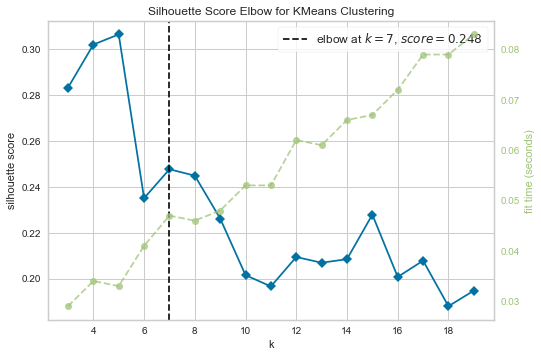

In [31]:
#optimize K-Means
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k = (3,20), metric = 'silhouette')
visualizer.fit(all_data)
visualizer.show()

<b> Plot and compare each features with K-Means Cluster with optimized number of cluster(s)

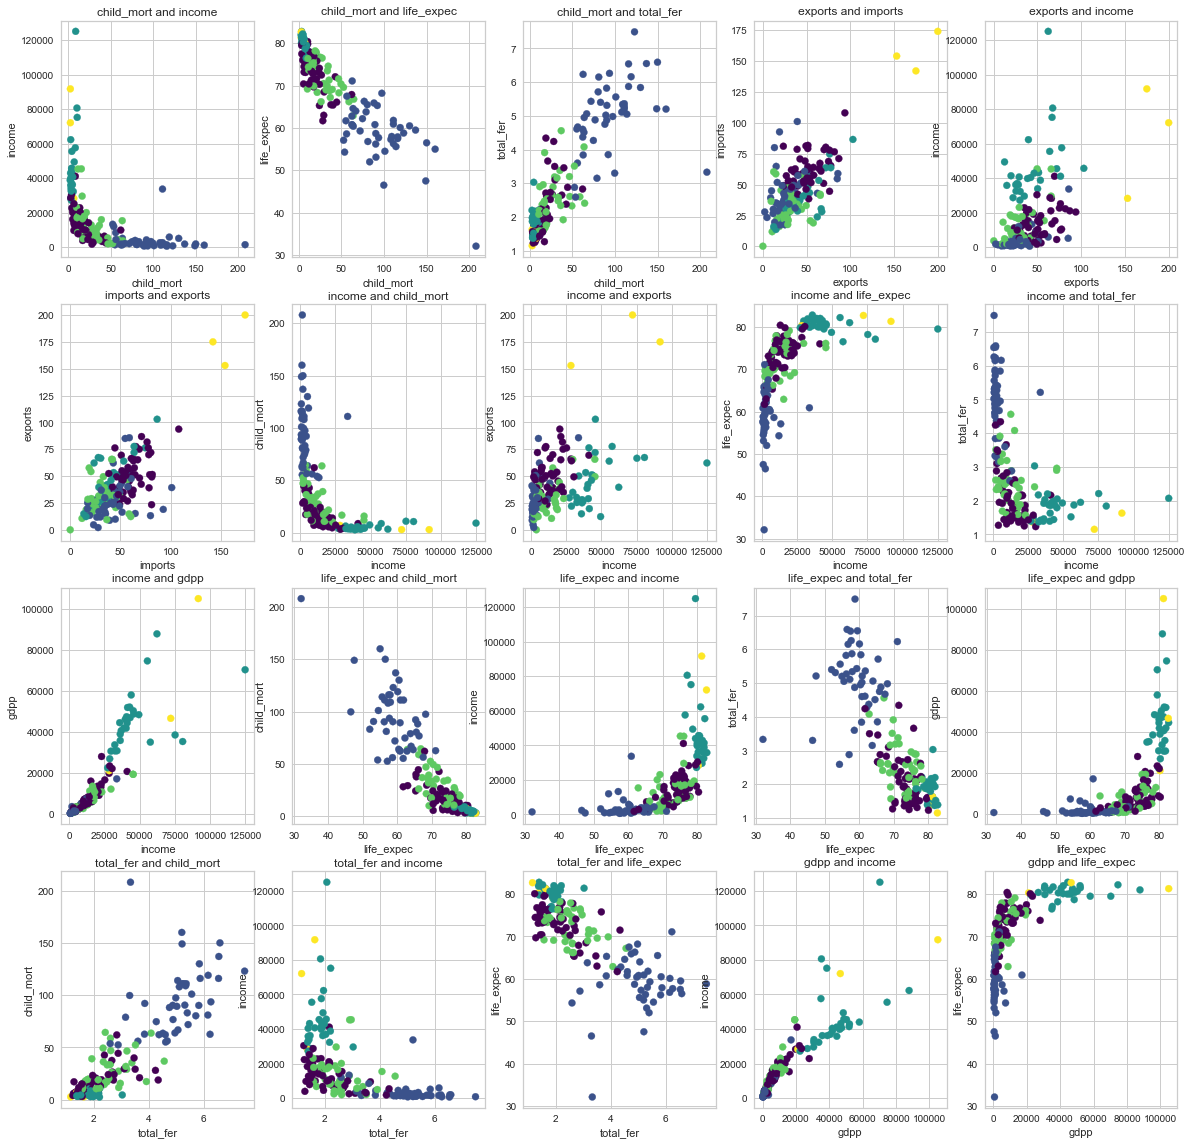

In [32]:
#optimize number of clusters - using elbow - yellowbrick
k_means = KMeans(n_clusters = 5, random_state = 123)
k_means.fit(all_data)
y_pred = k_means.predict(all_data)

#graph all features
'''
#incorporate each feature 
for i in range(9):
    for j in range(i+1,9):
        plt.scatter(all_data[:,i], all_data[:,j], c = y_pred)
        #plt.title(all_data[i])
        plt.ylabel(features.columns[i])
        plt.xlabel(features.columns[j])
        plt.show()
        
'''
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
#graph and focus only on strongly correlated features
plt.figure(figsize=(20,20))
num = 1
for i,j in strong_corr:
    plt.subplot(4, 5, num)
    plt.scatter(features[i], features[j], c = y_pred, cmap = 'viridis')
    plt.title(i + ' and '+ j)
    plt.xlabel(i)
    plt.ylabel(j)
    num += 1
plt.show()


In [33]:
#silhouette score
from sklearn import metrics
print(metrics.silhouette_score(all_data, y_pred, metric = 'euclidean'))

0.22406040764765994


>>#### II. K-Means: PCA - Dimensionality Reduction

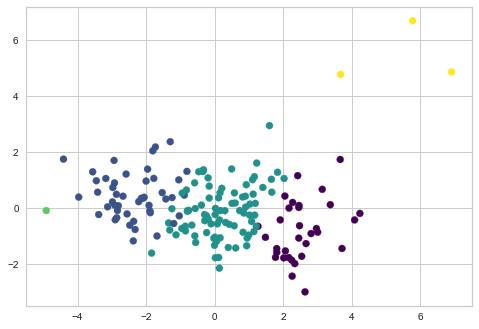

In [34]:
k_means_pca = KMeans(n_clusters = 5, random_state = 123)
k_means_pca.fit(pca_components)
pca_y_pred = k_means_pca.predict(pca_components)

plt.scatter(pca_components[:,0], pca_components[:,1], c = pca_y_pred, cmap = 'viridis')
plt.show()

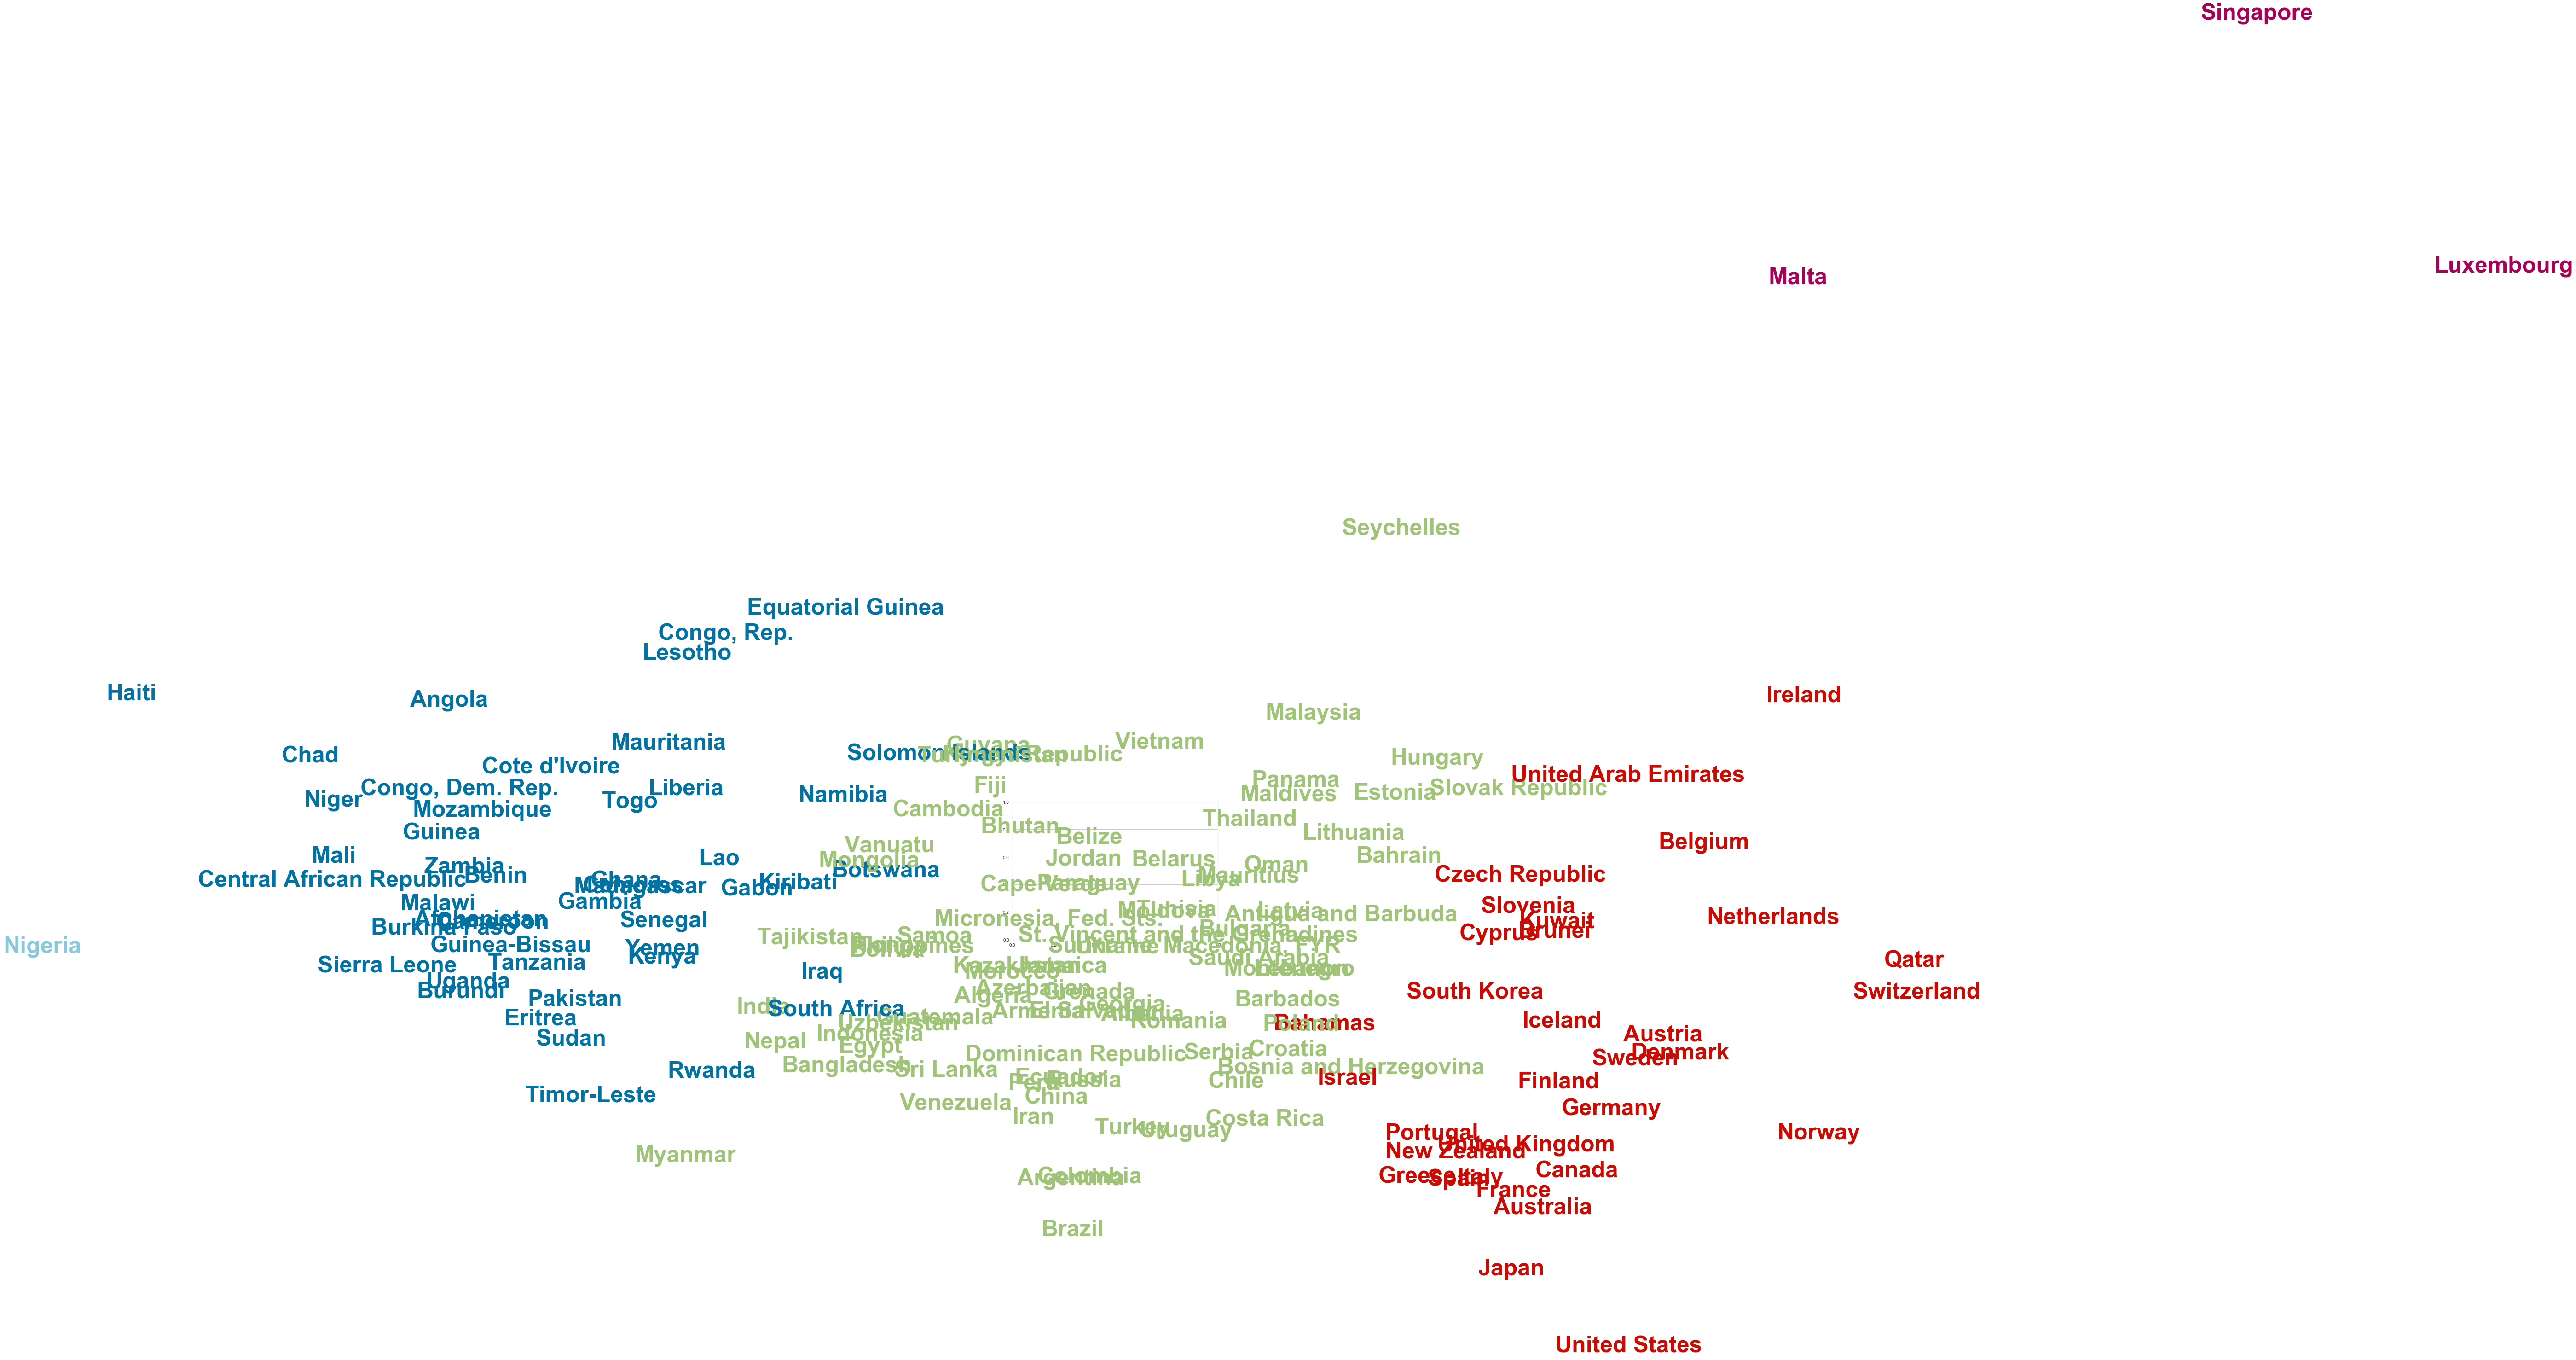

In [35]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color = colours[pca_y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [36]:
print(metrics.silhouette_score(pca_components, pca_y_pred, metric = 'euclidean'))

0.3255806324717655


>>#### III. K-Means: UMAP - Dimensionality Reduction

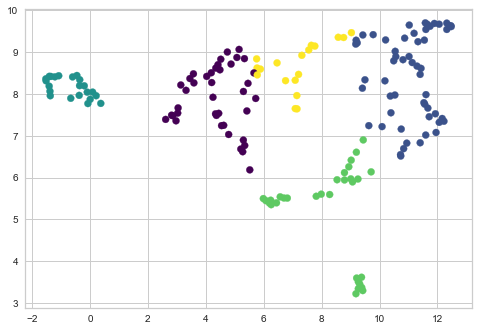

In [37]:
#use gridsearch

k_means_umap = KMeans(n_clusters = 5, random_state = 123)
k_means_umap.fit(umap_opt)
umap_y_pred = k_means_umap.predict(umap_opt)

plt.scatter(umap_opt[:,0], umap_opt[:,1], c = umap_y_pred, cmap = 'viridis')


plt.show()

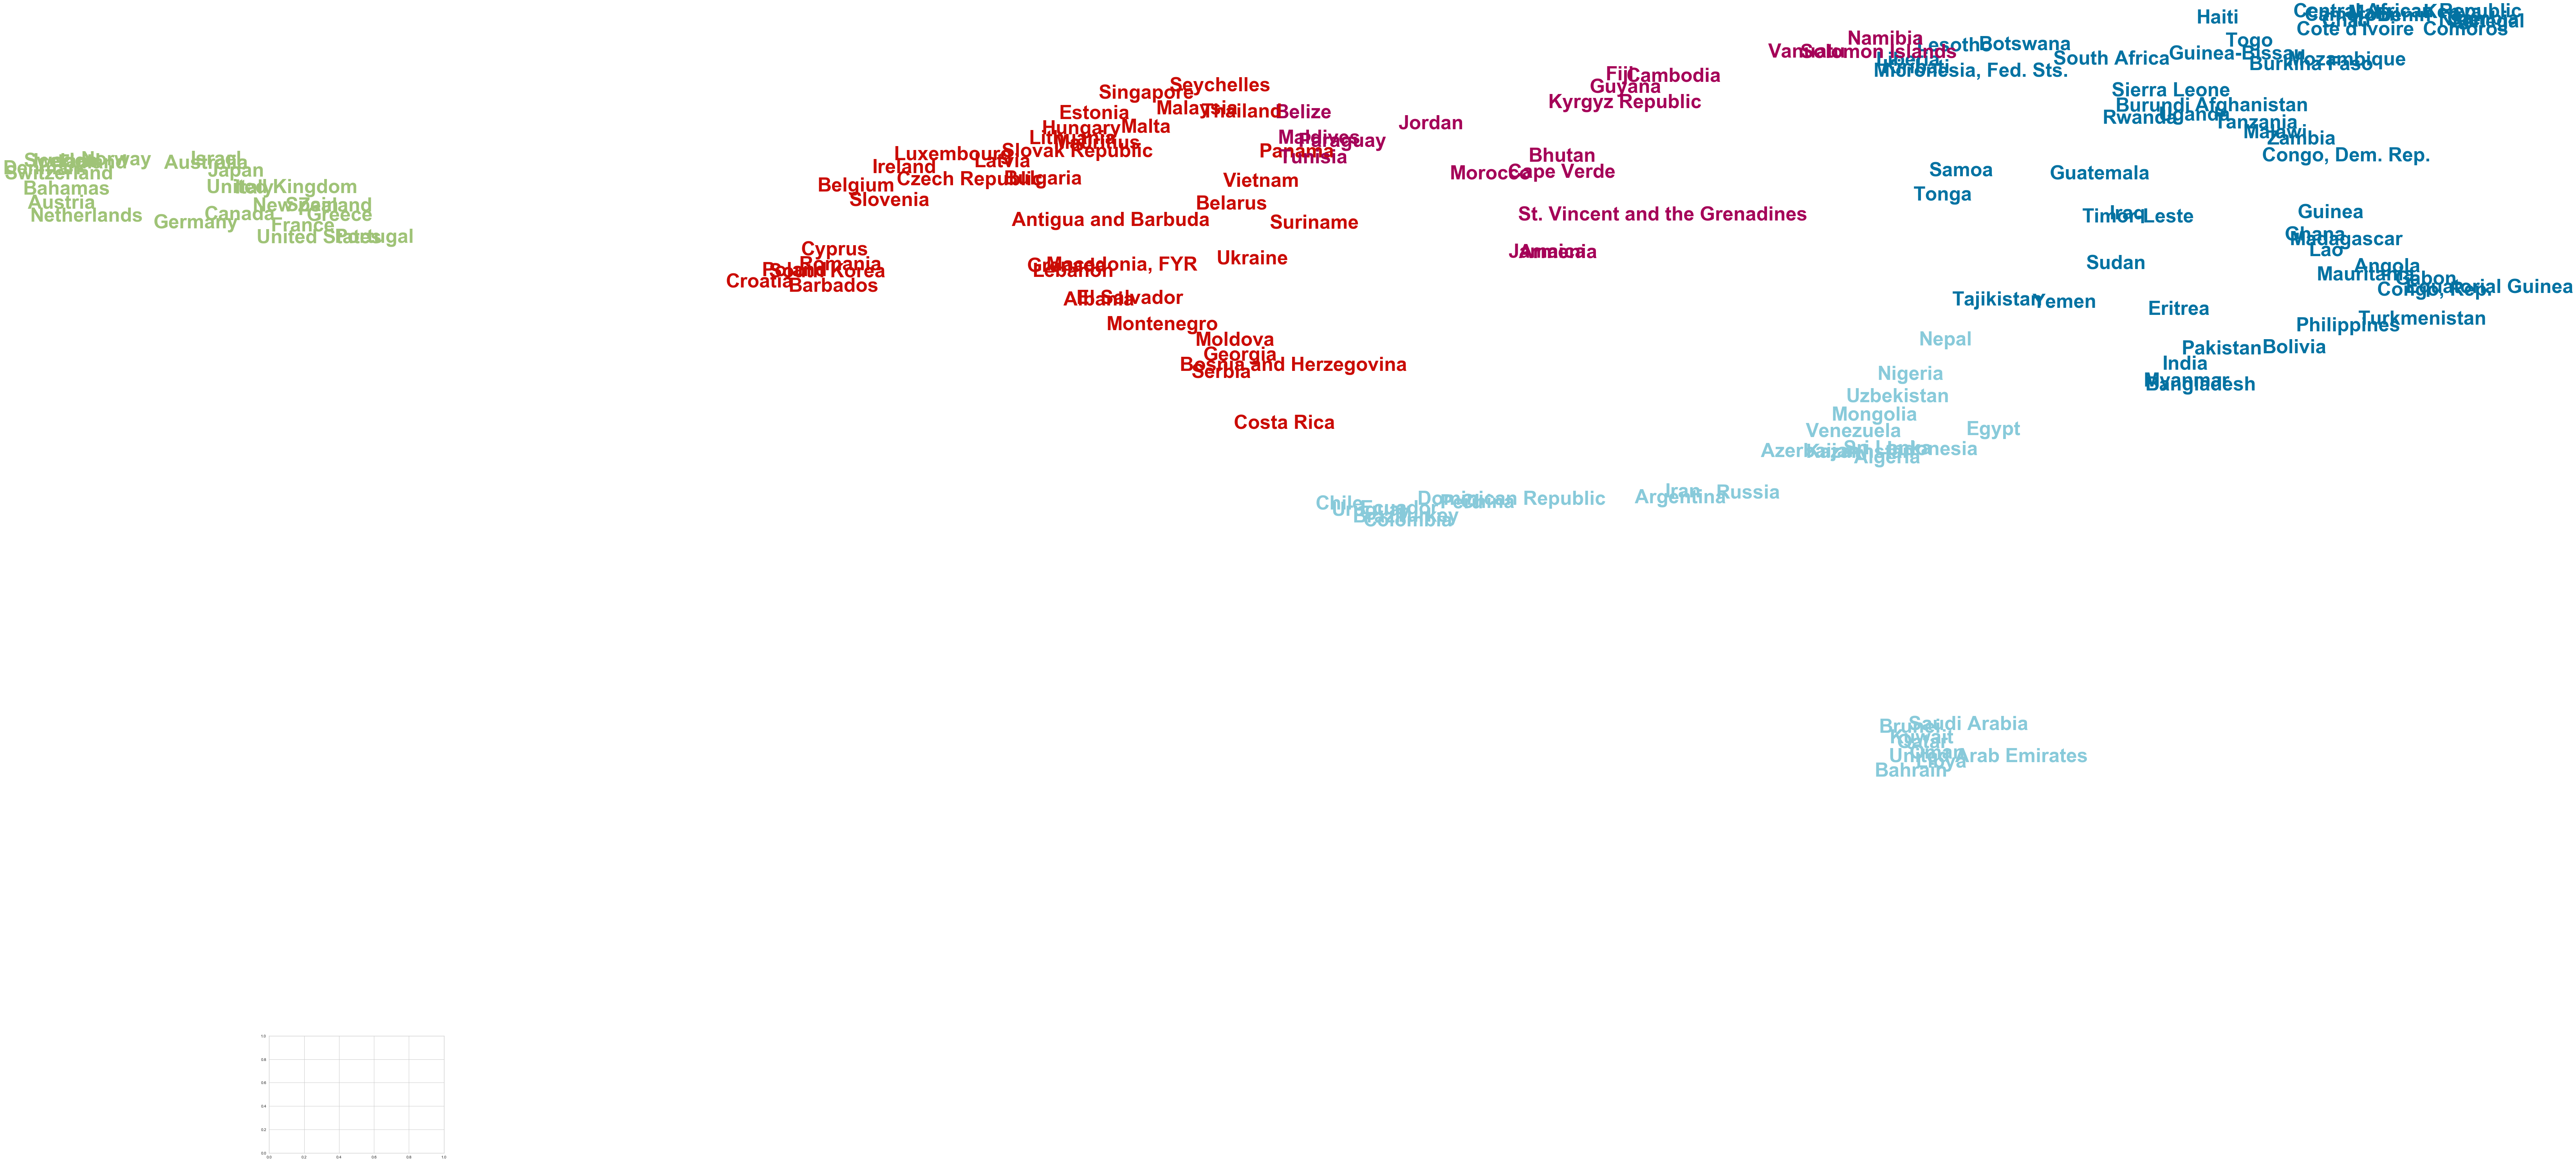

In [38]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_opt.shape[0]):
    plt.text(umap_opt[i, 0], umap_opt[i, 1], str(y[i]),
             color = colours[umap_y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [39]:
#silhouette score
from sklearn import metrics
print(metrics.silhouette_score(umap_opt, umap_y_pred, metric = 'euclidean'))

0.51547176


 ### <center>B. Hierarchical Clustering
 >> #### I. Plot Correlations
 >> #### II. Hierarchical: PCA - Dimensionality Reduction
 >> #### III. Hierarchical: UMAP - Dimensionality Reduction

>>#### I. Plot Correlations

In [40]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
#elbow method and silhoeutte score
#use n_clusters of 5
agg_cluster = AgglomerativeClustering(linkage = 'complete',
                                     affinity = 'cosine',
                                     n_clusters = 5)
agg_cluster.fit(all_data)
agg_pred = agg_cluster.fit_predict(all_data)

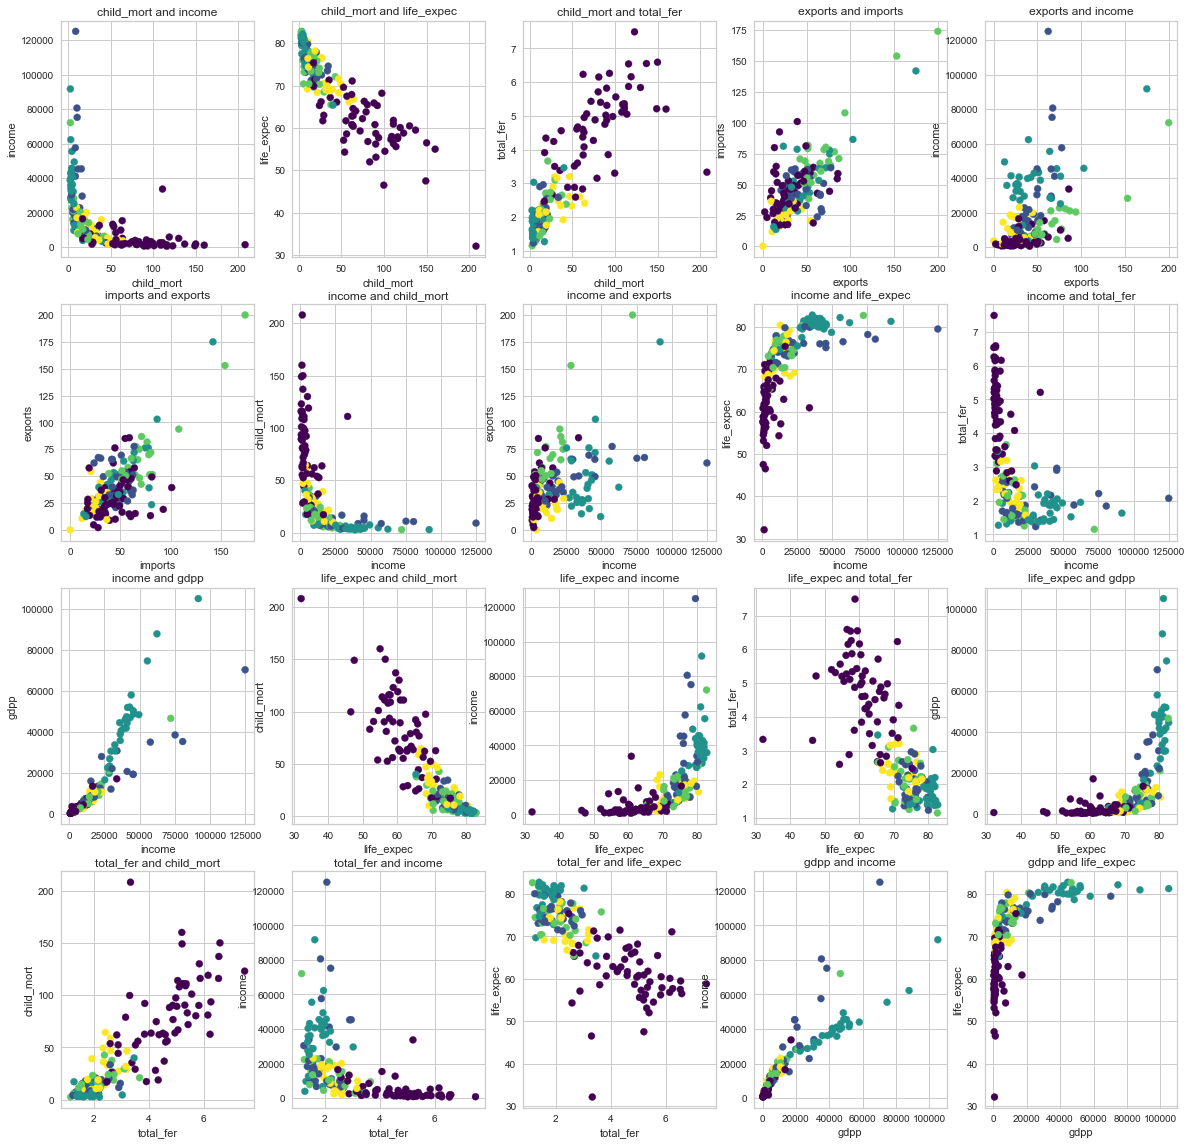

In [42]:
#incorporate and view all features (below)
'''
for i in range(9):
    for j in range(i+1,9):
        plt.scatter(all_data[:,i], all_data[:,j], c = agg_pred)
        #plt.title(all_data[i])
        plt.ylabel(features.columns[i])
        plt.xlabel(features.columns[j])
        plt.show()
#plt.scatter(pca_components[:,0], pca_components[:,1], c = y_pred)
#plt.show()

'''

#examine only strongly correlated features
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
#graph and focus only on strongly correlated features
plt.figure(figsize=(20,20))
num = 1
for i,j in strong_corr:
    plt.subplot(4, 5, num)
    plt.scatter(features[i], features[j], c = agg_pred, cmap = 'viridis')
    plt.title(i + ' and '+ j)
    plt.xlabel(i)
    plt.ylabel(j)
    num += 1
plt.show()



<b>Dendrogram of Hierarchical Clustering

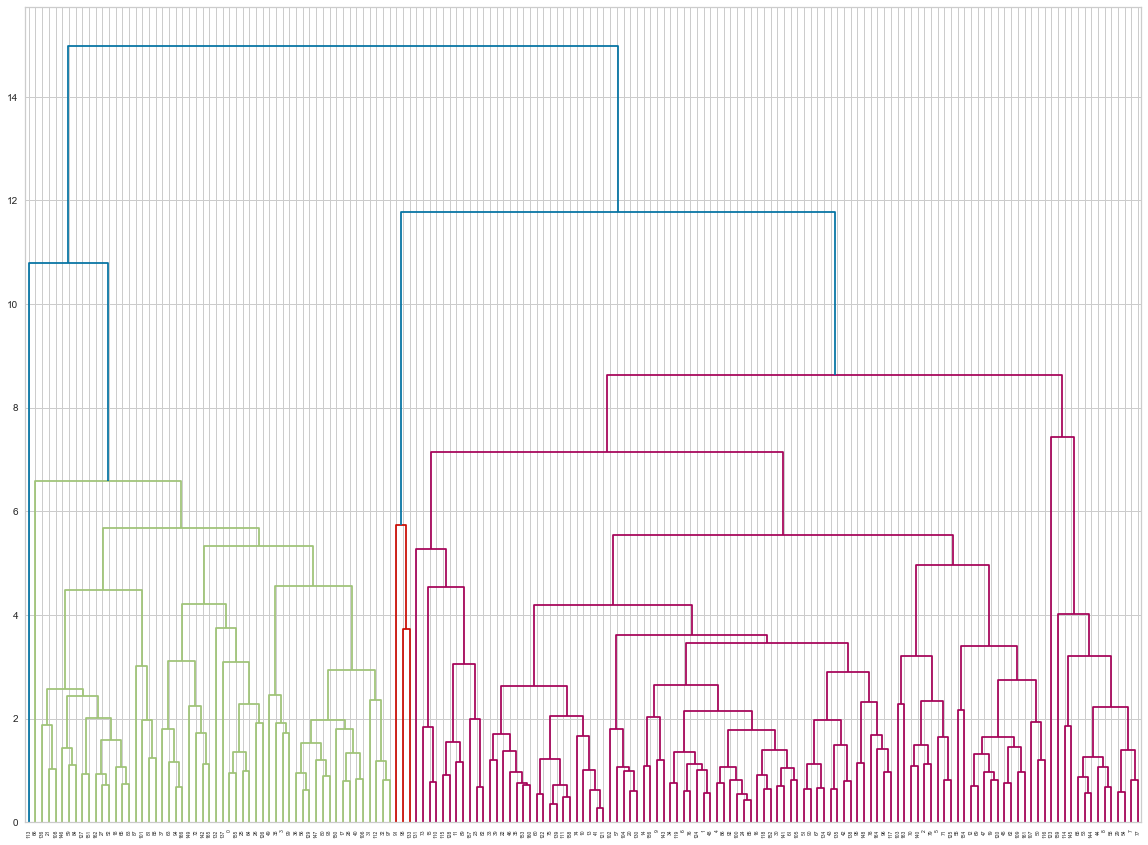

In [43]:
plt.figure(figsize=(20,15))
dendrogram(linkage(all_data, method='complete'))
plt.show()

In [44]:
print(metrics.silhouette_score(all_data, agg_pred, metric = 'euclidean'))

0.11802927979149122


>>#### II. Hierarchical: PCA - Dimensionality Reduction

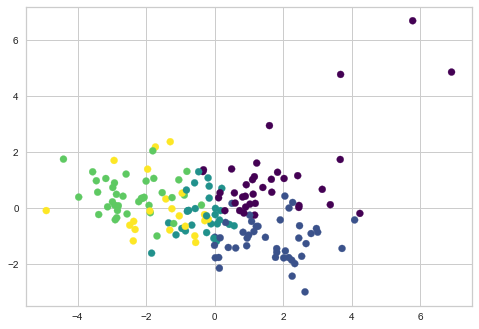

In [45]:
agg_pca = AgglomerativeClustering(linkage = 'complete', affinity = 'cosine', n_clusters = 5)
agg_pca.fit(pca_components)
agg_pca_y = agg_pca.fit_predict(pca_components)

plt.scatter(pca_components[:,0], pca_components[:,1], c = agg_pca_y, cmap = 'viridis')
plt.show()

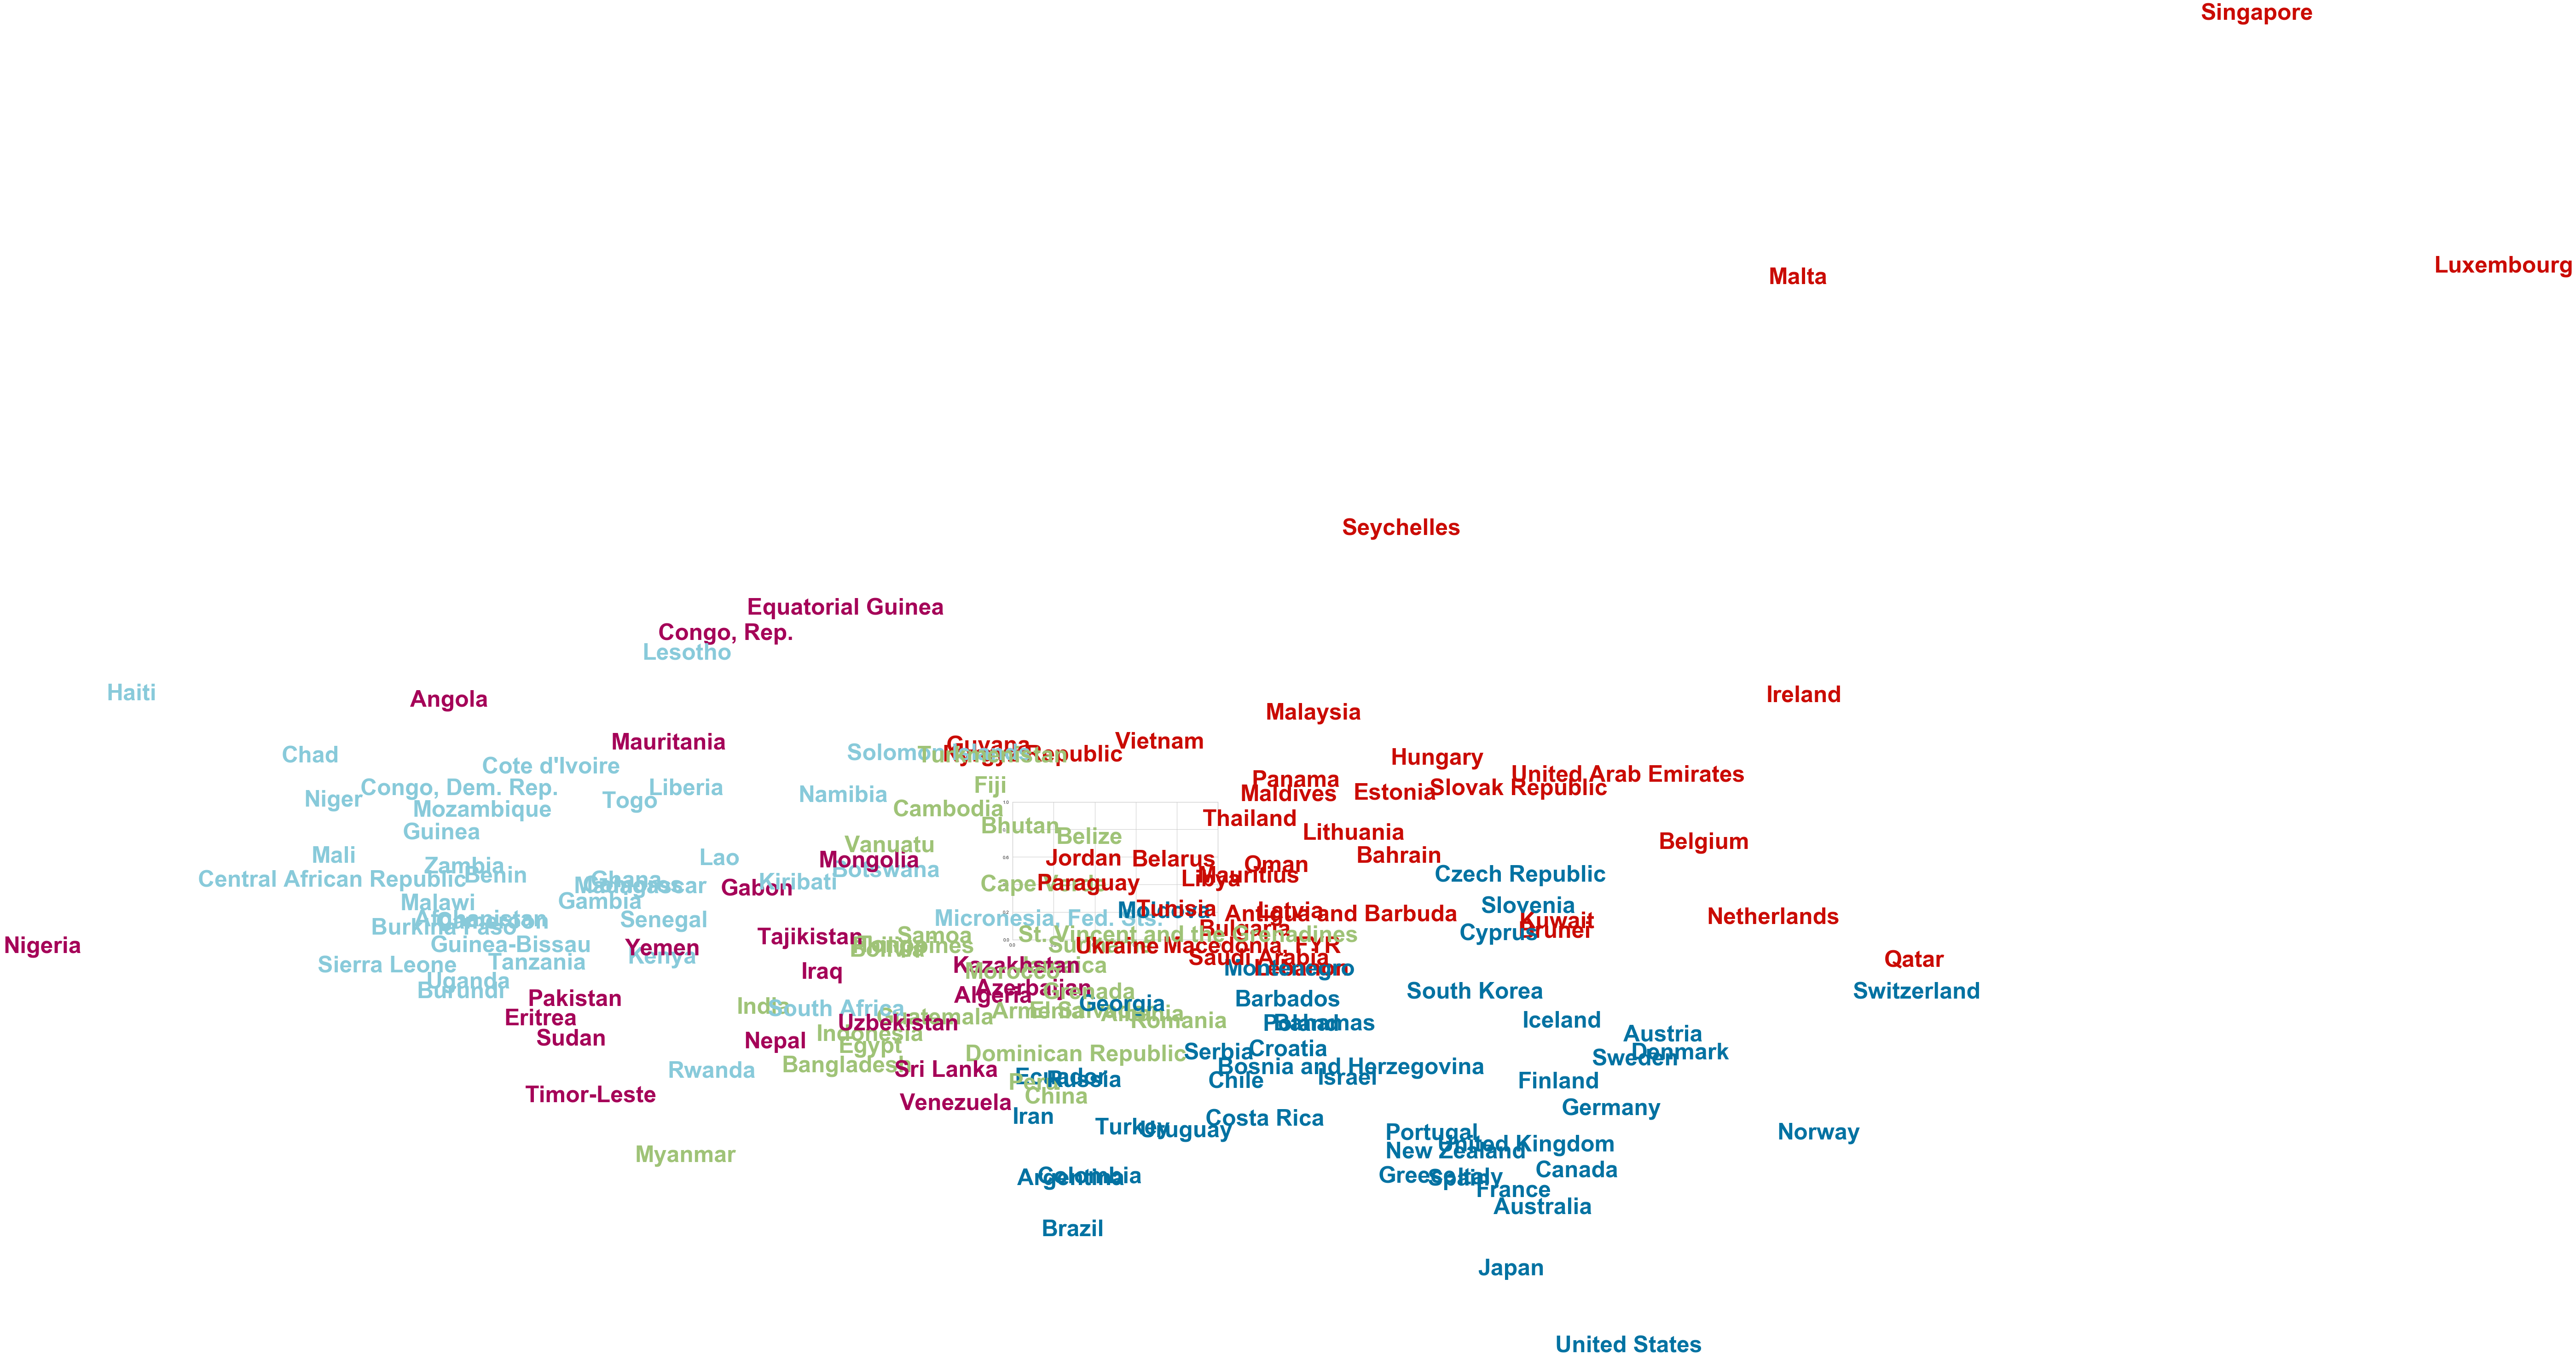

In [46]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color = colours[agg_pca_y[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [47]:
print(metrics.silhouette_score(pca_components, agg_pca_y, metric = 'euclidean'))

0.1465969898369832


>>#### III. Hierarchical: UMAP - Dimensionality Reduction

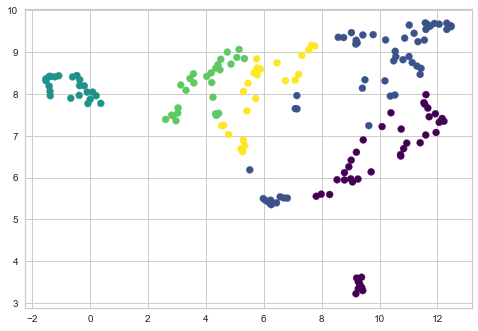

In [48]:
agg_umap = AgglomerativeClustering(linkage = 'complete', affinity = 'cosine', n_clusters = 5)

agg_umap.fit(umap_opt)
agg_umap_pred = agg_umap.fit_predict(umap_opt)

plt.scatter(umap_opt[:,0], umap_opt[:,1], c = agg_umap_pred, cmap = 'viridis')

plt.show()

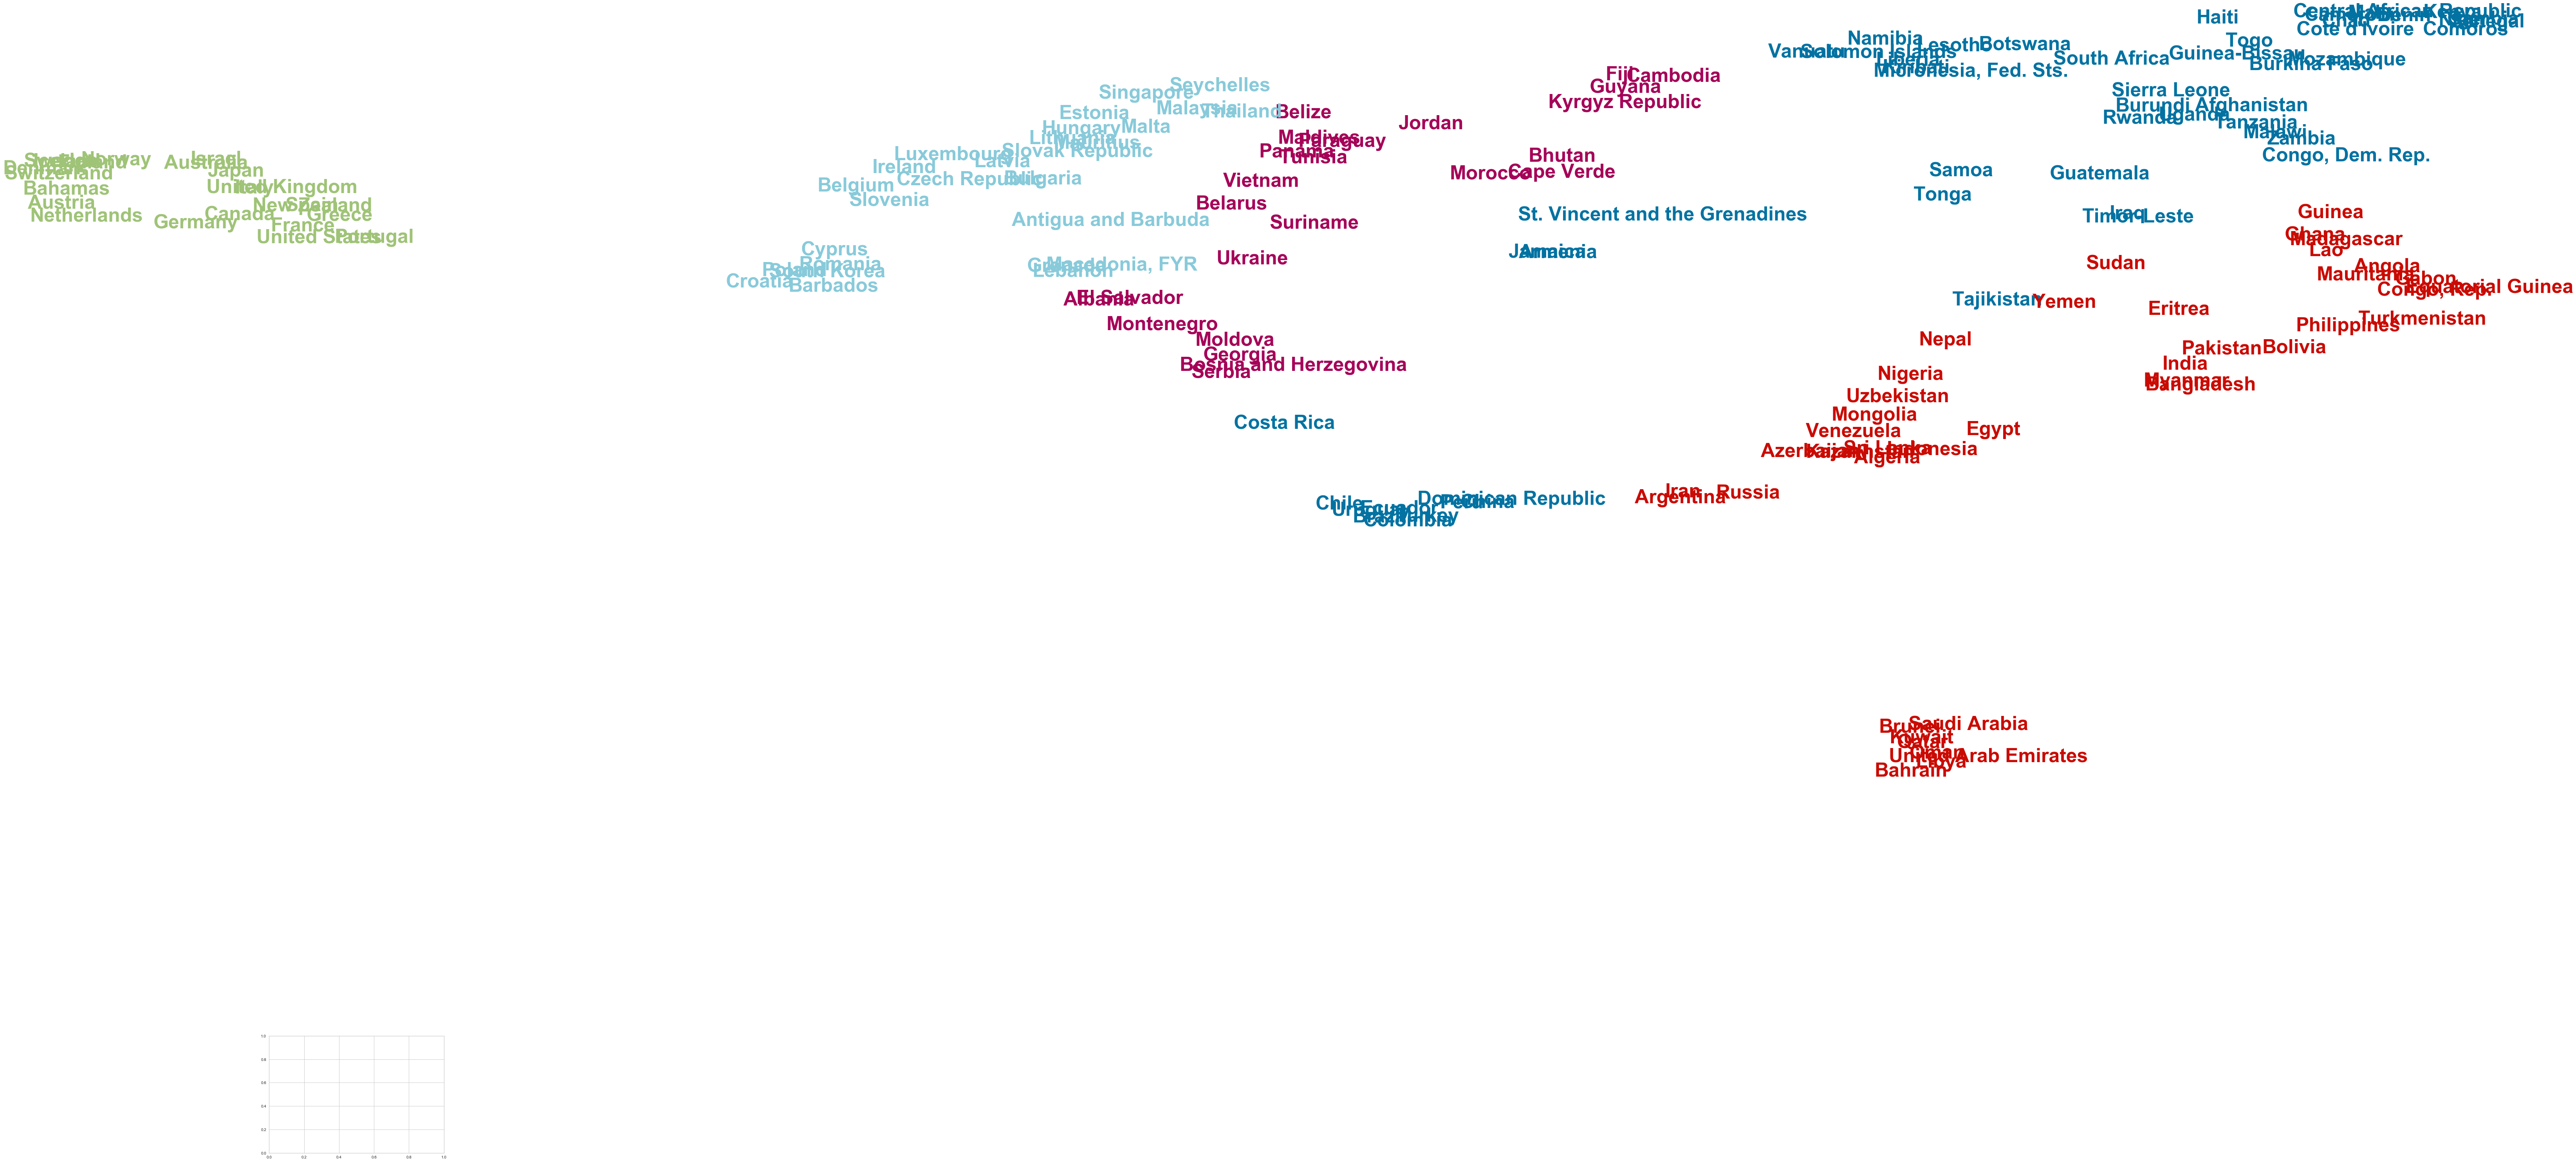

In [49]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_opt.shape[0]):
    plt.text(umap_opt[i, 0], umap_opt[i, 1], str(y[i]),
             color = colours[agg_umap_pred[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [50]:
print(metrics.silhouette_score(umap_opt, agg_umap_pred, metric = 'euclidean'))

0.32487807


 ### <center>C. DBSCAN Clustering
 >> #### I. Plot Correlations
 >> #### II. DBASCAN: PCA - Dimensionality Reduction
 >> #### III. DBSCAN: UMAP - Dimensionality Reduction

>>#### I. Plot Correlations

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
dbscan_cluster = DBSCAN(eps = 1, min_samples = 5)
dbscan = dbscan_cluster.fit_predict(all_data)

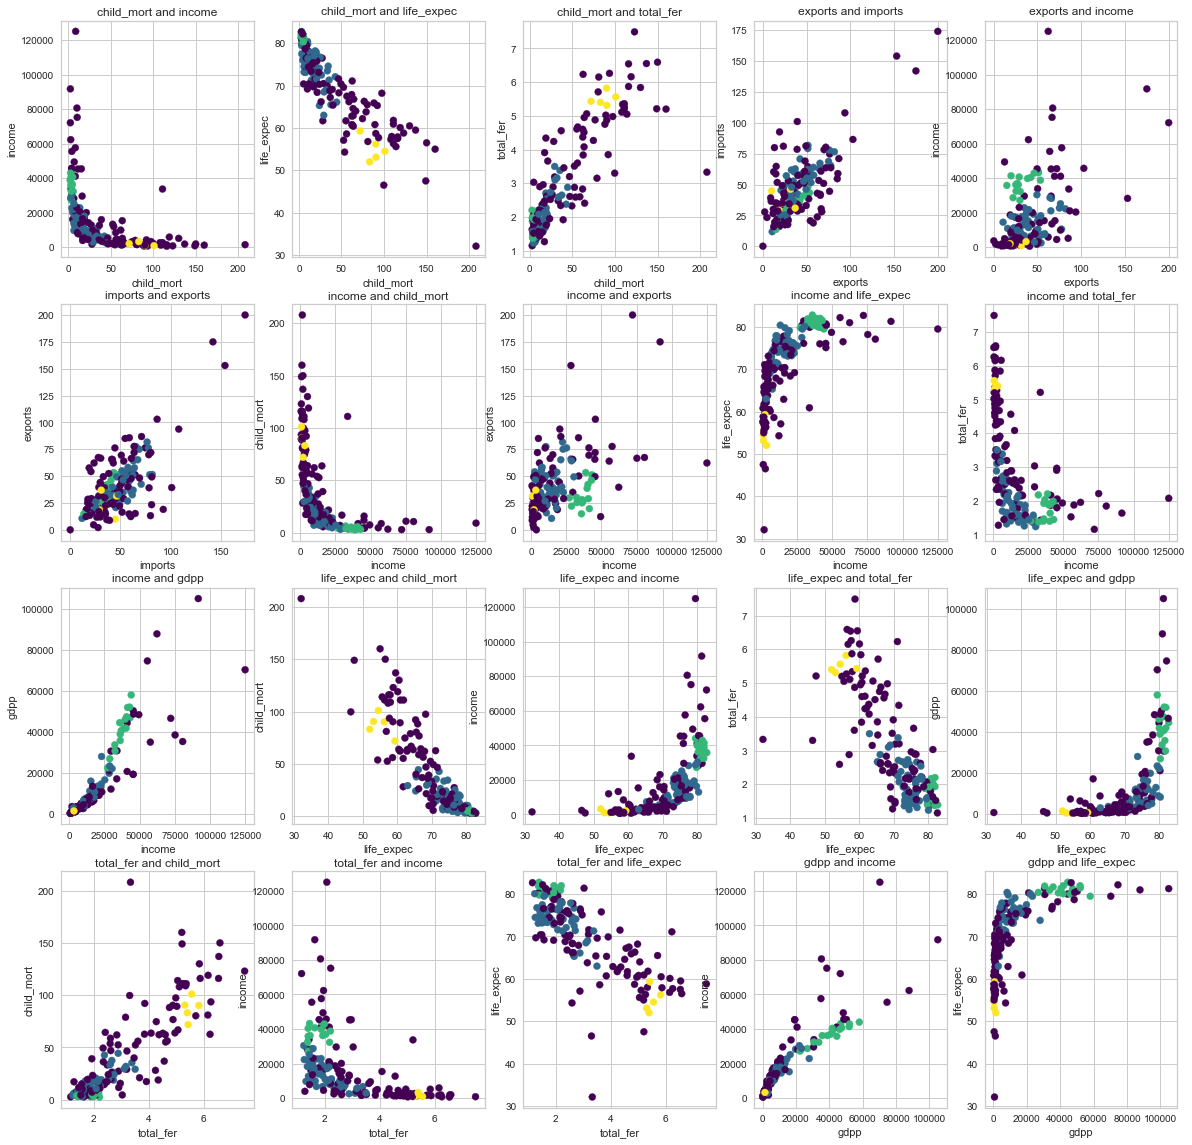

In [53]:
#to view all features:
'''
#incorporate each feature 
for i in range(9):
    for j in range(i+1,9):
        plt.scatter(all_data[:,i], all_data[:,j], c = dbscan)
        #plt.title(all_data[i])
        plt.ylabel(features.columns[i])
        plt.xlabel(features.columns[j])
        plt.show()
'''

#examine only strongly correlated features
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
#graph and focus only on strongly correlated features
plt.figure(figsize=(20,20))
num = 1
for i,j in strong_corr:
    plt.subplot(4, 5, num)
    plt.scatter(features[i], features[j], c = dbscan, cmap = 'viridis')
    plt.title(i + ' and '+ j)
    plt.xlabel(i)
    plt.ylabel(j)
    num += 1
plt.show()

In [54]:
print(metrics.silhouette_score(all_data, dbscan, metric = 'euclidean'))

-0.024818901891032592


>>#### II. DBASCAN: PCA - Dimensionality Reduction

In [55]:
dbscan_pca = DBSCAN(eps = 1,min_samples = 5)
dbscan_pca.fit(pca_components)
dbscan_pca_pred = dbscan_pca.fit_predict(pca_components)


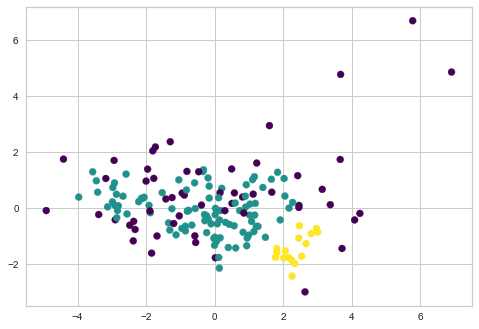

In [56]:
plt.scatter(pca_components[:,0], pca_components[:,1], c = dbscan_pca_pred, cmap = 'viridis')
plt.show()

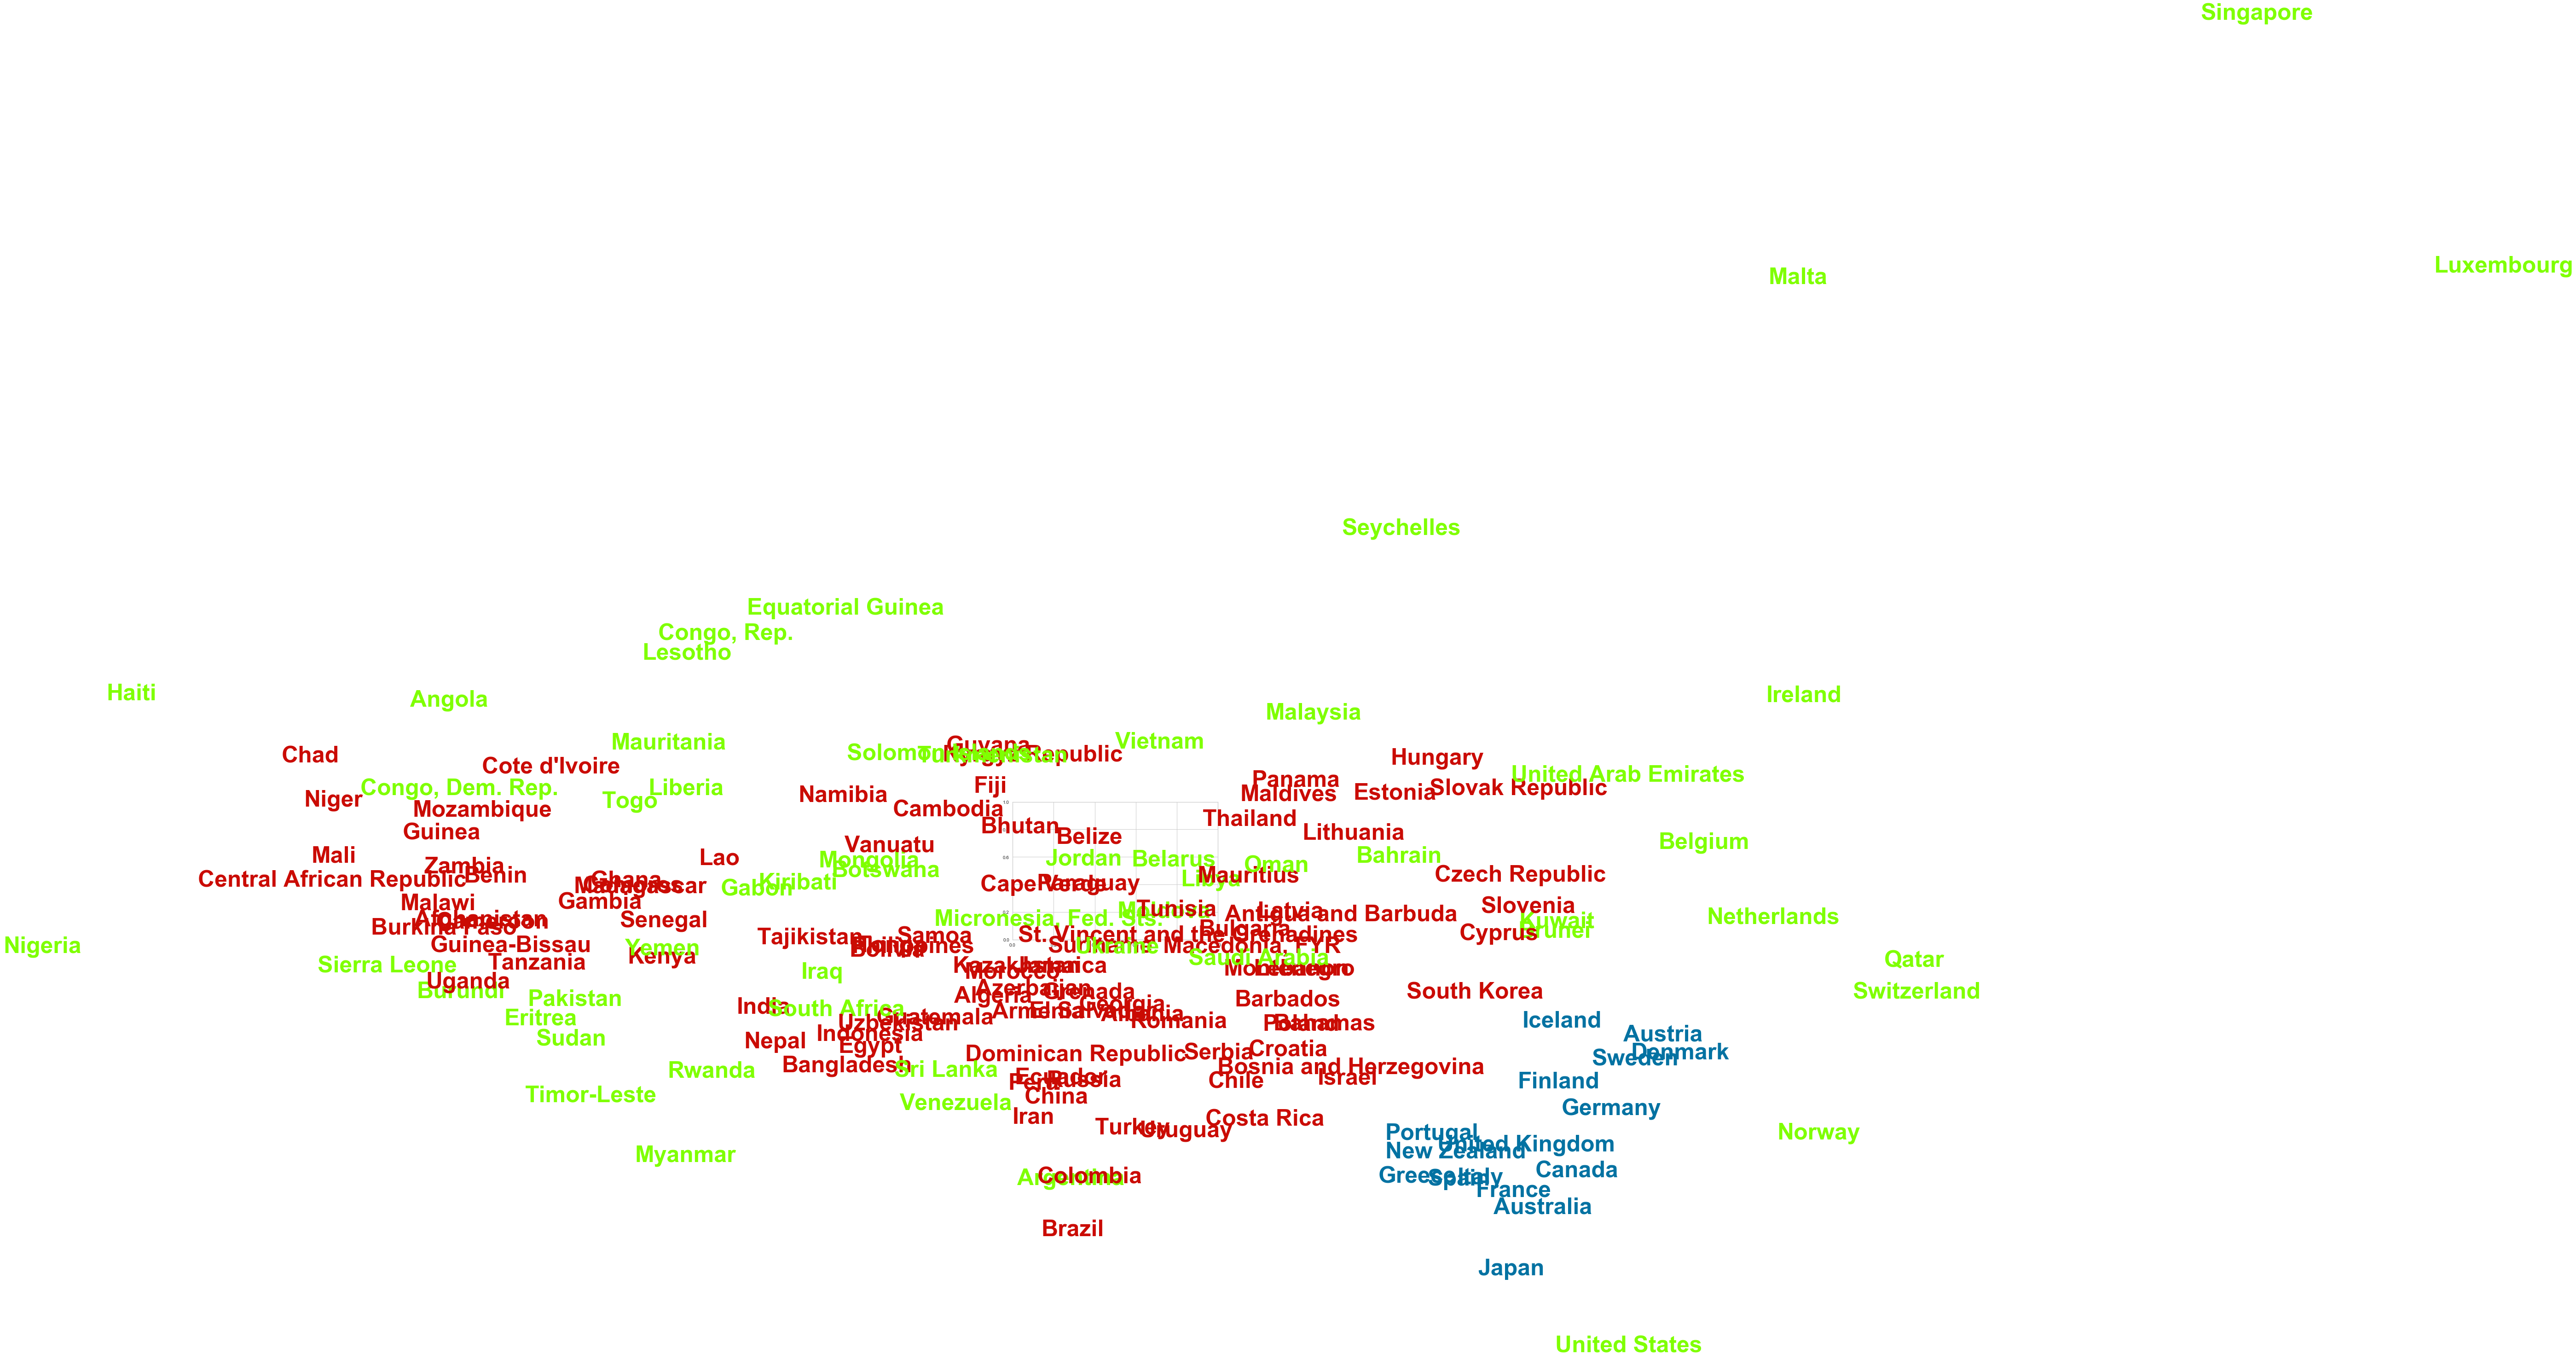

In [57]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color = colours[dbscan_pca_pred[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [58]:
print(metrics.silhouette_score(pca_components, dbscan_pca_pred, metric = 'euclidean'))

0.11524512198968657


>>#### III. DBASCAN: UMAP - Dimensionality Reduction

In [59]:
dbscan_umap = DBSCAN(eps = 1,min_samples = 5)
dbscan_umap.fit(umap_opt)
dbscan_umap_pred = dbscan_pca.fit_predict(umap_opt)



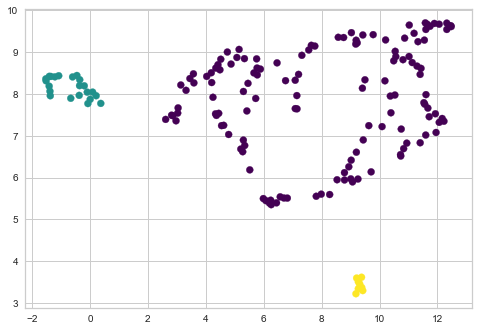

In [60]:
plt.scatter(umap_opt[:,0], umap_opt[:,1], c = dbscan_umap_pred, cmap = 'viridis')
plt.show()

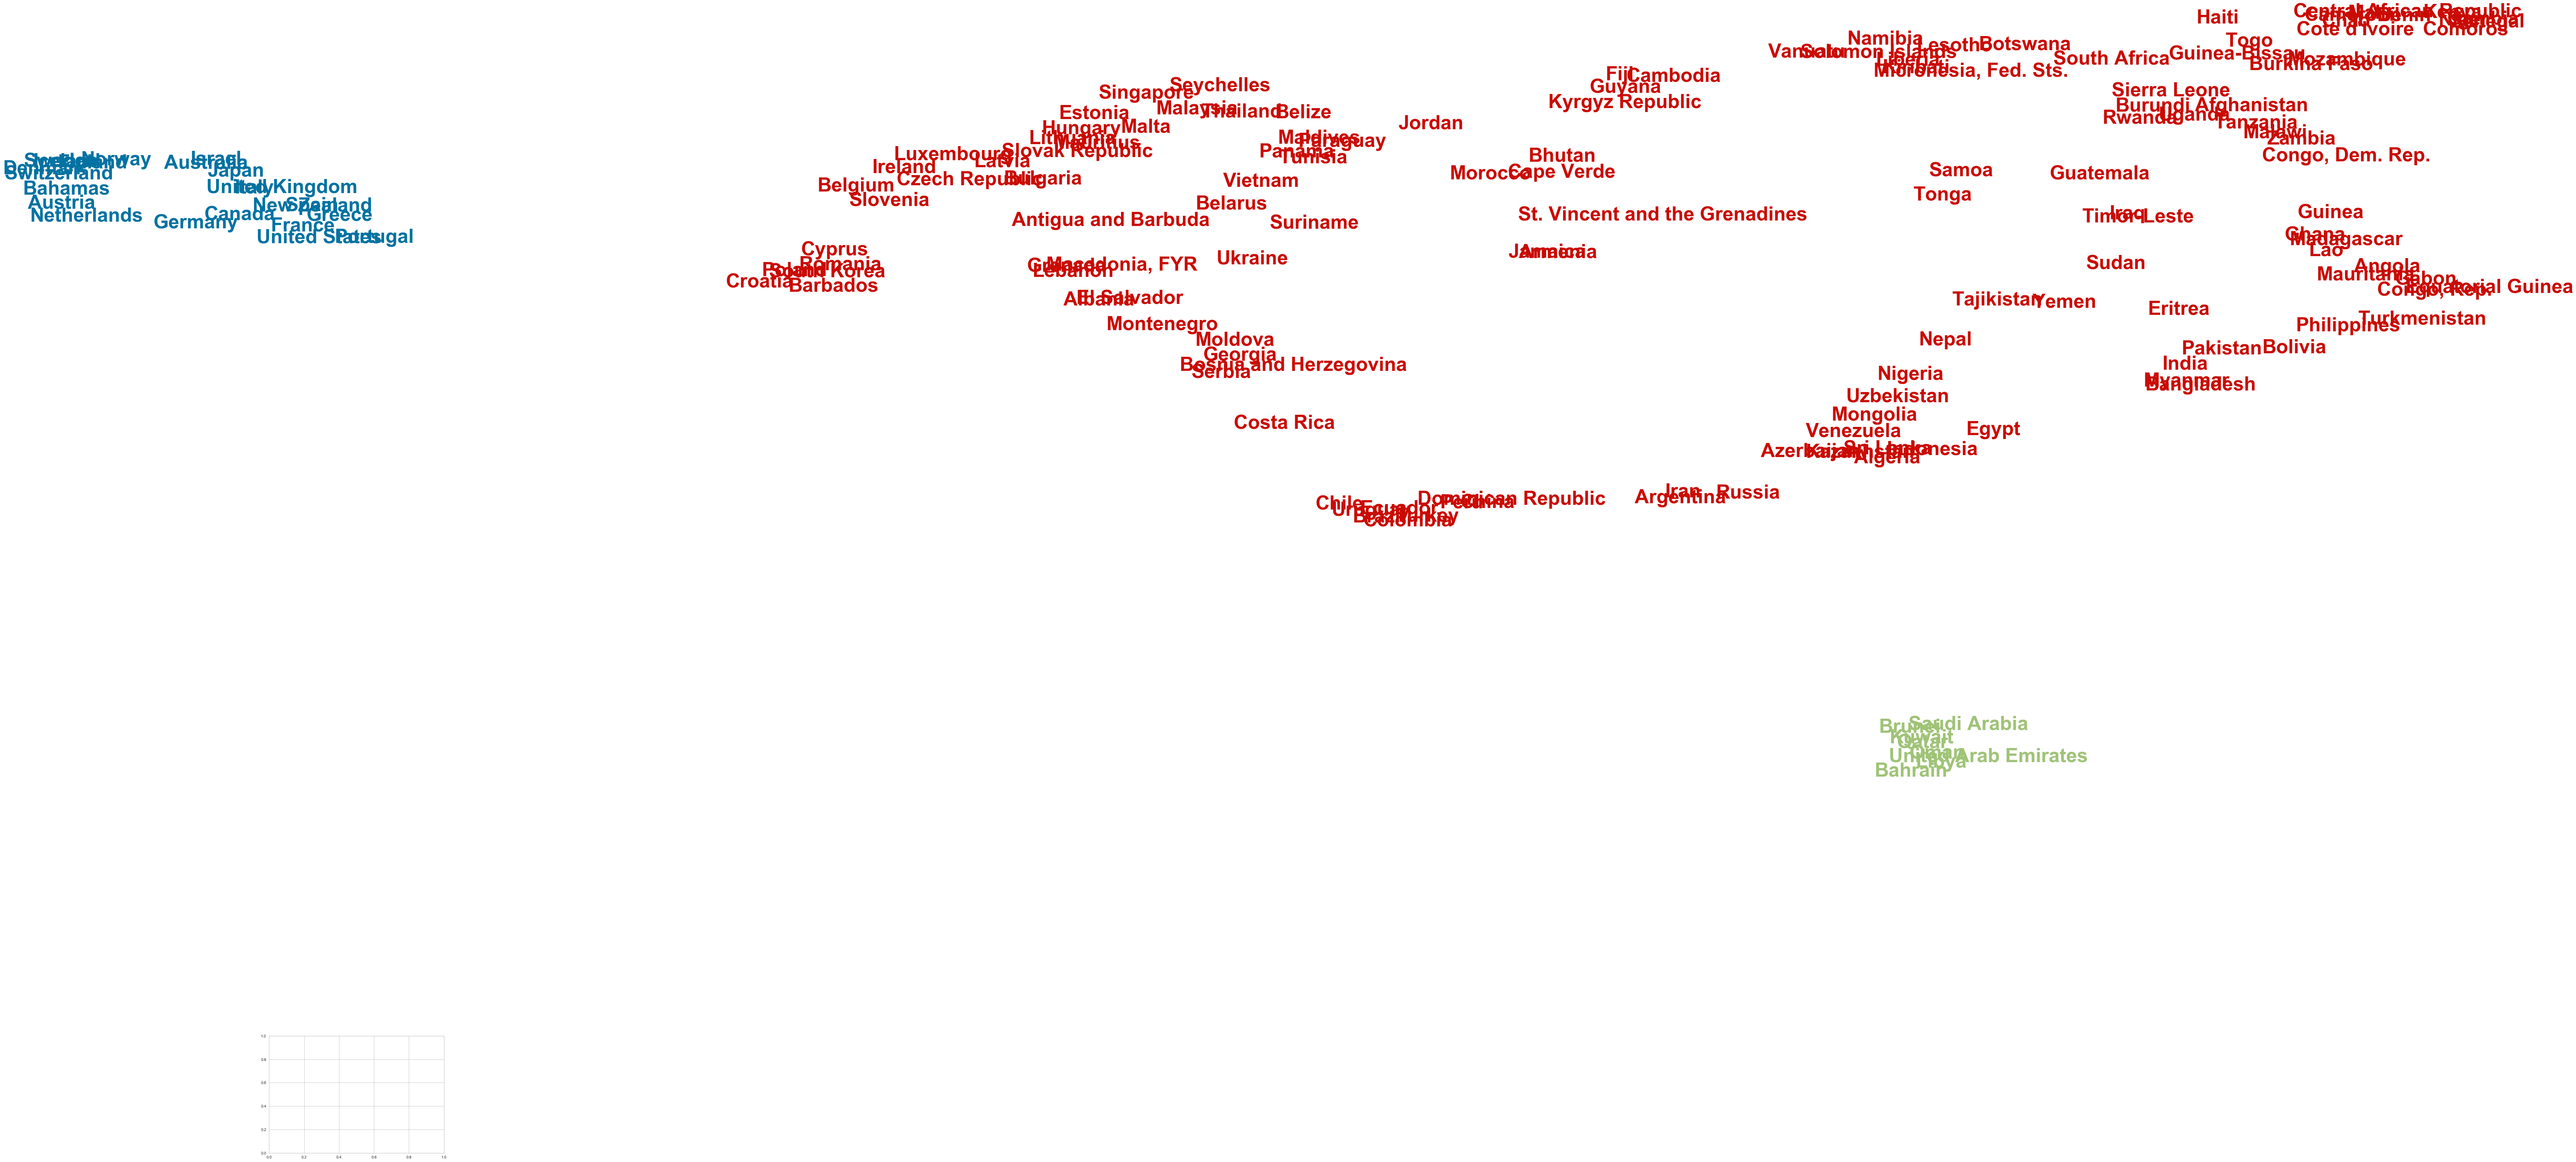

In [61]:
y = data['country']
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_opt.shape[0]):
    plt.text(umap_opt[i, 0], umap_opt[i, 1], str(y[i]),
             color = colours[dbscan_umap_pred[i]],
             fontdict={'weight': 'bold', 'size': 50})
   

In [62]:
print(metrics.silhouette_score(umap_opt, dbscan_umap_pred, metric = 'euclidean'))

0.2917122


 ## <center>4. Conclusion


<b>After reviewing and examining each model - visually and comparing the silhouette scores, K-Means Clustering with UMAP Dimensionality reduction yields the best result.

Silhouette Score: .5848<br>
Visually, we can see the clusters most distinctly in contrast to other models.<br>
Similar countries are grouped together as expected<br>
USA is grouped with other similar countries (UK, Japan, Germany, France, etc.)<br>
Further analysis needs to be conducted in examining how well these countries do in contrast to other countries.